In [60]:
import pandas as pd

donwload the dataset and put under `data`

## Load user responses

In [61]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data.head()

QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
0         898    2111    280203          1              2            2
1         767    3062     55638          1              3            3
2         165    1156    386475          1              2            2
3         490    1653    997498          1              4            4
4         298    3912    578636          1              3            3

In [62]:
len(data)

1382727

In [63]:
f = open("data/Question_data.csv", "w+")

f.write('QuestionId,CorrectRate\n')

# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    f.write(str(k) + ',' + str(df['IsCorrect'].mean()) + '\n')
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())
    
f.close()

0 2812 0.44345661450924606 0.009370109336123865
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190472
3 2672 0.8087574850299402 0.007609645680958997
4 1704 0.4014084507042254 0.011878216105764141
5 833 0.1908763505402161 0.013624539924512919
6 1718 0.5285215366705471 0.012046950521125577
7 89 0.34831460674157305 0.05078827950334113
8 2327 0.3919209282337774 0.010122188032315182
9 834 0.36330935251798563 0.016664029411268565
10 1572 0.4020356234096692 0.012370345562832924
11 2171 0.45831414094887146 0.010696101386212253
12 1701 0.3991769547325103 0.011877678361556359
13 1259 0.6965845909451946 0.012961803326362792
14 1697 0.6682380671773719 0.011433151502268899
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912677
17 848 0.42924528301886794 0.017007317337094298
18 2173 0.3175333640128854 0.009988619831022786
19 2692 0.6355869242199108 0.009277428244661849
20 1707 0.6338605741066198 0.011663545946428995
21 137 0.40875912408759124

635 2705 0.6022181146025878 0.00941230658128676
636 1713 0.7472270869819031 0.010503636649445513
637 2650 0.680377358490566 0.009060511489839764
638 2677 0.4874859917818454 0.00966253067795952
639 2879 0.6137547759638764 0.00907577266078991
640 2345 0.3859275053304904 0.01005504190594577
641 1575 0.31238095238095237 0.01168191004149621
642 2861 0.5169521146452289 0.009344094762267807
643 865 0.6832369942196532 0.01582690673483676
644 2385 0.6348008385744235 0.009861216783074982
645 2313 0.6688283614353653 0.009787910601034518
646 2616 0.6685779816513762 0.009205149944872603
647 467 0.32762312633832974 0.021742060532398584
648 78 0.47435897435897434 0.056905314133886616
649 136 0.4852941176470588 0.043014531310745674
650 2630 0.5422053231939163 0.009716770934234958
651 82 0.5853658536585366 0.05473986416456408
652 603 0.7081260364842454 0.018529116574340764
653 2164 0.6312384473197782 0.010373881414449528
654 320 0.68125 0.026090536694665257
655 2375 0.5835789473684211 0.010117560025757

In [64]:
#Correct answer rate for all questions
Question_data = pd.read_csv('data/Question_data.csv')
Question_data

QuestionId  CorrectRate
0             0     0.443457
1             1     0.571429
2             2     0.385214
3             3     0.808757
4             4     0.401408
..          ...          ...
943         943     0.566528
944         944     0.142857
945         945     0.422336
946         946     0.459459
947         947     0.617124

[948 rows x 2 columns]

In [65]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


Unnamed: 0.1  Unnamed: 0  left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS
0             0           0   909    318       2      2      2    1.0      2
1            16          16   285    609       2      2      2    2.0      2
2            48          48   132    271       1      2      2    2.0      1
3            38          38   704    127       2      2      1    2.0      2
4            33          33    16    586       1      1      2    2.0      2

<Axes: >

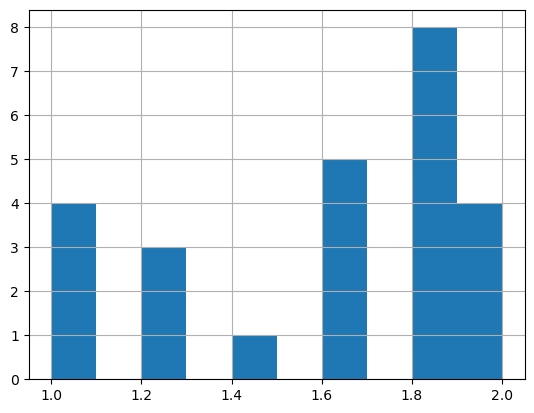

In [66]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<Axes: >

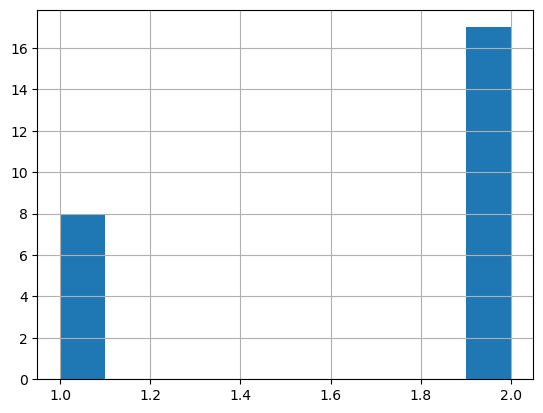

In [67]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [68]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


Unnamed: 0.1  Unnamed: 0  left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS
0            15          15   145    762       2      2      2    2.0      2
1            31          31   307    208       1      1      1    2.0      1
2            25          25   278    195       1      1      1    1.0      1
3             3           3    13    153       2      2      2    2.0      2
4            40          40    23    100       2      1      1    1.0      1

<Axes: >

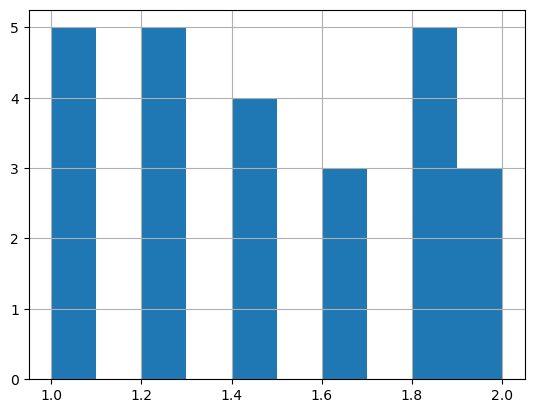

In [69]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

<Axes: >

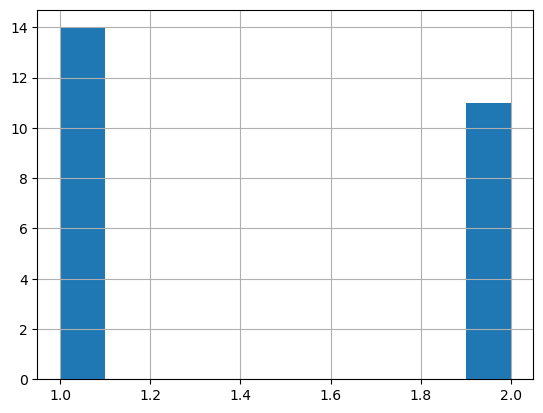

In [70]:
# decide preference
eval_test['preference'] = calc_preference(eval_test['score'])
eval_test['preference'].hist()

In [71]:
#Confidence Information Using Metadata
metadata = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')[["AnswerId", "Confidence"]].dropna()
answer_to_id = pd.read_csv('data/train_data/train_task_3_4.csv')[["QuestionId", "AnswerId"]]
metadata = metadata.merge(answer_to_id, on="AnswerId")

avg_con = metadata.groupby('QuestionId')[["Confidence"]].mean()

avg_con

Confidence
QuestionId            
0            66.176471
2            66.201354
3            85.021246
4            59.343434
5            77.419355
...                ...
943          83.793687
944          69.852941
945          72.244733
946          72.058824
947          75.240385

[904 rows x 1 columns]

## Data preprocessing 

Pre-processing training data

In [72]:
data_training = pd.merge(eval_validation, Question_data, how='left', left_on='left', right_on='QuestionId')
data_training.rename(columns={'CorrectRate':'left_rate'}, inplace=True)
data_training = pd.merge(data_training, Question_data, how='left', left_on='right', right_on='QuestionId')
data_training.rename(columns={'CorrectRate':'right_rate'}, inplace=True)

data_training.drop(columns={'QuestionId_x','QuestionId_y', 'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)
data_training.drop(columns={'T1_ALR', 'T2_CL', 'T3_GF', 'T4_MQ', 'T5_NS', 'score'}, axis=1, inplace=True)
data_training.loc[data_training['preference'] == 1, 'preference'] = 0
data_training.loc[data_training['preference'] == 2, 'preference'] = 1

data_training = pd.merge(data_training, avg_con, how='left', left_on='left', right_on='QuestionId')
data_training.rename(columns={'Confidence':'left_con'}, inplace=True)
data_training = pd.merge(data_training, avg_con, how='left', left_on='right', right_on='QuestionId')
data_training.rename(columns={'Confidence':'right_con'}, inplace=True)

data_training.dropna(inplace=True)

data_training

left  right  preference  left_rate  right_rate   left_con  right_con
0    909    318           1   0.530864    0.512821  57.692308  59.375000
1    285    609           1   0.651419    0.452665  72.151163  74.909091
2    132    271           1   0.387779    0.387486  73.653846  57.352941
3    704    127           1   0.577481    0.431193  74.769939  81.666667
4     16    586           1   0.583478    0.246761  83.974359  69.561688
5     56    865           1   0.516450    0.297436  80.238589  70.547945
6    233    478           0   0.490023    0.601036  64.595170  76.973684
7    877    620           1   0.514231    0.423168  67.350746  64.075630
8    246    733           0   0.309091    0.847059  82.346491  90.909091
9    668    741           0   0.720177    0.711146  80.719237  85.860656
10   691      4           1   0.655678    0.401408  72.312961  59.343434
11   403    830           1   0.652292    0.513130  78.012685  72.882653
12   404     27           1   0.448221    0.451696  70.833333  70.696325
13   202    761           1   0.777678    0.404580  84.541420  74.901575
14   555    815           0   0.446585    0.774282  62.648810  83.290155
15   527    876           1   0.714608    0.379747  83.369883  75.000000
16   225    558           1   0.344444    0.466667  81.944444  77.777778
17   316    121           1   0.302083    0.359281  54.250000  62.500000
18   363    780           1   0.711934    0.394322  81.492933  73.369565
19   118    116           0   0.518489    0.532516  74.857955  82.425068
21   527    129           1   0.714608    0.479628  83.369883  71.858864
22   327    721           1   0.412210    0.604527  72.560976  82.729008
24   547    578           0   0.517100    0.577778  77.536998  82.142857

Pre-processing of test data(Private data) to verify model accuracy

In [73]:
data_test = pd.merge(eval_test, Question_data, how='left', left_on='left', right_on='QuestionId')
data_test.rename(columns={'CorrectRate':'left_rate'}, inplace=True)
data_test = pd.merge(data_test, Question_data, how='left', left_on='right', right_on='QuestionId')
data_test.rename(columns={'CorrectRate':'right_rate'}, inplace=True)

data_test.drop(columns={'QuestionId_x','QuestionId_y', 'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)
data_test.drop(columns={'T1_ALR', 'T2_CL', 'T3_GF', 'T4_MQ', 'T5_NS', 'score'}, axis=1, inplace=True)

data_test.loc[data_test['preference'] == 1, 'preference'] = 0
data_test.loc[data_test['preference'] == 2, 'preference'] = 1

data_test

left  right  preference  left_rate  right_rate
0    145    762           1   0.477912    0.286624
1    307    208           0   0.267534    0.243590
2    278    195           0   0.541384    0.748630
3     13    153           1   0.696585    0.750000
4     23    100           0   0.449050    0.666667
5    532    104           0   0.481132    0.224719
6    155    479           0   0.164776    0.438889
7    304    907           0   0.561602    0.844262
8    242    129           0   0.374269    0.479628
9    688    287           1   0.751592    0.666667
10   289     72           1   0.484324    0.534785
11    40    219           0   0.350135    0.458164
12   184    606           1   0.619337    0.500000
13   439    430           0   0.259906    0.310789
14   394     95           0   0.777009    0.384439
15   744     74           0   0.552074    0.486194
16   432    340           1   0.639188    0.531646
17   611    104           1   0.294298    0.224719
18   376    172           1   0.665810    0.301948
19   515    357           0   0.445783    0.571429
20   570    428           1   0.600267    0.333333
21   361    836           0   0.408597    0.515854
22   365    381           1   0.317482    0.672414
23   740    223           0   0.514783    0.270000
24   798    851           1   0.692612    0.329412

## Learn to model

In [74]:
#Utilize the Logistic Regression model to apply to preference (1, 2) 

import statsmodels.api as sm
import statsmodels.formula.api as smf

#using correct rate & confidence
model = smf.glm(formula = 'preference ~ left_rate+right_rate+left_con', 
                data=data_training, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             preference   No. Observations:                   23
Model:                            GLM   Df Residuals:                       19
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.0498
Date:                Wed, 10 May 2023   Deviance:                       8.0997
Time:                        21:38:58   Pearson chi2:                     7.41
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5488
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1751     23.026      1.180      0.238     -17.955      72.305
left_rate     -6.5793     16.347     -0.402      0.687     -38.619      25.461
right_rate   -40.1953     27.990     -1.436      0.151     -95.055      14.664
left_con      -0.0161      0.150     -0.107      0.915      -0.311       0.279
==============================================================================
"""

In [75]:
#Confidence determines that the p-value is high and that it is not appropriate
#so it is decided to use only correct rate
model1 = smf.glm(formula = 'preference ~ left_rate+right_rate', 
                data=data_training, family=sm.families.Binomial())
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             preference   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.0556
Date:                Wed, 10 May 2023   Deviance:                       8.1113
Time:                        21:38:58   Pearson chi2:                     7.42
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5485
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.6330     22.792      1.169      0.243     -18.039      71.305
left_rate     -7.3353     15.377     -0.477      0.633     -37.474      22.803
right_rate   -40.6138     28.556     -1.422      0.155     -96.583      15.355
==============================================================================
"""

In [76]:
#left_rate's p-value is also high and that it is not appropriate
#However, it is strange that only one value affects the comparison of the two objects when understood in common sense,
#so I would like to make two models and check them all.
model2 = smf.glm(formula = 'preference ~ right_rate', 
                data=data_training, family=sm.families.Binomial())
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             preference   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.1995
Date:                Wed, 10 May 2023   Deviance:                       8.3989
Time:                        21:38:59   Pearson chi2:                     8.06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5429
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.2063      8.841      2.059      0.039       0.879      35.534
right_rate   -32.3600     16.165     -2.002      0.045     -64.043      -0.677
==============================================================================
"""

In [77]:
# Learn the training data in Model 1 and check the appropriate probabilities.

Xtrain = sm.add_constant(data_training.loc[:, 'left_rate':'right_rate'])
Ytrain = data_training.preference

prob = fit1.predict(Xtrain)

Yhat = 1*(prob>0.3)
print("0.3 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.5)
print("0.5 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.7)
print("0.7 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.9)
print("0.9 : %f" % np.mean(Ytrain==Yhat))

0.3 : 0.869565
0.5 : 0.913043
0.7 : 0.913043
0.9 : 0.826087


In [78]:
# Learn the training data in Model 2 and check the appropriate probabilities.

Xtrain = sm.add_constant(data_training.loc[:, 'left_rate':'right_rate'])
Ytrain = data_training.preference

prob = fit2.predict(Xtrain)

Yhat = 1*(prob>0.3)
print("0.3 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.5)
print("0.5 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.7)
print("0.7 : %f" % np.mean(Ytrain==Yhat))

Yhat = 1*(prob>0.9)
print("0.9 : %f" % np.mean(Ytrain==Yhat))

0.3 : 0.869565
0.5 : 0.913043
0.7 : 0.913043
0.9 : 0.869565


In [79]:
# Verifying the probability of Model 1 using test data
Xtest = sm.add_constant(data_test.loc[:, 'left_rate':'right_rate'])
Ytest = data_test.preference

prob_test = fit1.predict(Xtest)

Yhat_test = 1*(prob_test>0.3)
print("0.3 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.5)
print("0.5 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.7)
print("0.7 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.9)
print("0.9 : %f" % np.mean(Ytest==Yhat_test))

0.3 : 0.440000
0.5 : 0.440000
0.7 : 0.440000
0.9 : 0.360000


In [81]:
# Verifying the probability of Model 2 using test data
Xtest = sm.add_constant(data_test.loc[:, 'left_rate':'right_rate'])
Ytest = data_test.preference

prob_test = fit2.predict(Xtest)

Yhat_test = 1*(prob_test>0.3)
print("0.3 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.5)
print("0.5 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.7)
print("0.7 : %f" % np.mean(Ytest==Yhat_test))

Yhat_test = 1*(prob_test>0.9)
print("0.9 : %f" % np.mean(Ytest==Yhat_test))

0.3 : 0.440000
0.5 : 0.480000
0.7 : 0.480000
0.9 : 0.400000


## To Ranking

In [82]:
#Generate the number of all cases that compare problems
left_Question_data = Question_data.copy()
left_Question_data.rename(columns={'QuestionId' : 'left', 'CorrectRate':'left_rate'}, inplace=True)
right_Question_data = Question_data.copy()
right_Question_data.rename(columns={'QuestionId' : 'right', 'CorrectRate':'right_rate'}, inplace=True)

main_data = pd.merge(left_Question_data.assign(key=1), right_Question_data.assign(key=1), on='key').drop('key', axis=1)
main_data.drop(main_data[main_data['left'] == main_data['right']].index, inplace=True)
main_data = main_data[['left','right','left_rate','right_rate']]

main_data

left  right  left_rate  right_rate
1          0      1   0.443457    0.571429
2          0      2   0.443457    0.385214
3          0      3   0.443457    0.808757
4          0      4   0.443457    0.401408
5          0      5   0.443457    0.190876
...      ...    ...        ...         ...
898698   947    942   0.617124    0.458716
898699   947    943   0.617124    0.566528
898700   947    944   0.617124    0.142857
898701   947    945   0.617124    0.422336
898702   947    946   0.617124    0.459459

[897756 rows x 4 columns]

In [83]:
#The probability is determined to use 0.5
Xresult = sm.add_constant(main_data.loc[:, 'left_rate':'right_rate'])

prob_result = fit2.predict(Xresult)
Yhat_result = 1*(prob_result>0.5)

main_data['preference']=Yhat_result
main_data

left  right  left_rate  right_rate  preference
1          0      1   0.443457    0.571429           0
2          0      2   0.443457    0.385214           1
3          0      3   0.443457    0.808757           0
4          0      4   0.443457    0.401408           1
5          0      5   0.443457    0.190876           1
...      ...    ...        ...         ...         ...
898698   947    942   0.617124    0.458716           1
898699   947    943   0.617124    0.566528           0
898700   947    944   0.617124    0.142857           1
898701   947    945   0.617124    0.422336           1
898702   947    946   0.617124    0.459459           1

[897756 rows x 5 columns]

In [84]:
#Create a group around 'left Question'
#so that the sum of the preferences is the number of defeats
rank_model2 = main_data.groupby('left')[["preference"]].sum()

#Ranking based on the number of defeats
rank_model2['ranking'] = rank_model2['preference'].rank(method='first')

rank_model2['QuestionId'] = rank_model2.index

rank_model2[['QuestionId',"ranking"]].to_csv('20182637.csv', index=False)
rank_model2[['QuestionId',"ranking"]]

QuestionId  ranking
left                     
0              0      1.0
1              1    608.0
2              2      2.0
3              3    609.0
4              4      3.0
...          ...      ...
943          943    947.0
944          944    605.0
945          945    606.0
946          946    607.0
947          947    948.0

[948 rows x 2 columns]

## Evaluate

code from https://competitions.codalab.org/forums/22145/4564/

In [85]:
template = pd.read_csv('20182637.csv')
len(template)

948

In [86]:
template.head()

QuestionId  ranking
0           0      1.0
1           1    608.0
2           2      2.0
3           3    609.0
4           4      3.0

In [87]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    
evaluate(eval_test, template)

[1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2]


<Axes: xlabel='right_rate', ylabel='preference'>

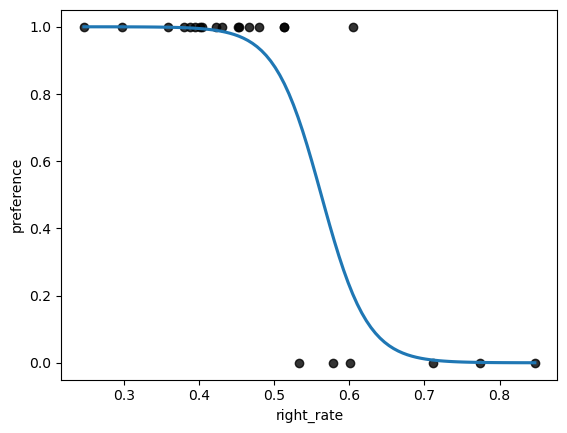

In [88]:
import seaborn as sns

x = data_training['right_rate']
y = data_training['preference']

sns.regplot(x=x, y=y, data=data, logistic = True, ci = None, scatter_kws={'color':'black'})